# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

# Loading Dataset and train test split

In [ ]:

#print(os.listdir("../input/"))
testX = pd.read_csv('testX.csv')
print(testX.shape)
testX.head()

(10000, 785)


,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [ ]:
testy = pd.read_csv('testy.csv')
print(testy.shape)
testy.head()

trainX = pd.read_csv('trainX.csv')

trainy = pd.read_csv('trainy.csv')
# print(trainy.shape)



(10000, 2)


In [ ]:

print('trainX:',trainX.shape)
print('trainy:',trainy.shape)
print('testX:',testX.shape)
print('testy:', testy.shape)


df_X = pd.concat([trainX, testX], axis=0)
print(df_X.shape)
df_y = pd.concat([trainy, testy], axis=0)
print(df_y.shape)

trainX: (60000, 785)
trainy: (60000, 2)
testX: (10000, 785)
testy: (10000, 2)
(70000, 785)
(70000, 3)


In [ ]:
trainX.count()

Id     60000
0      60000
1      60000
2      60000
3      60000
       ...  
779    60000
780    60000
781    60000
782    60000
783    60000
Length: 785, dtype: int64

In [ ]:
trainX.nunique()

Id     60000
0          5
1         17
2         28
3         55
       ...  
779      254
780      246
781      231
782      182
783       68
Length: 785, dtype: int64

In [ ]:
trainy.count()

Id        60000
 Label    60000
dtype: int64

In [ ]:
trainy.nunique()

Id        60000
 Label        5
dtype: int64

In [ ]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.
x_train = trainX.drop(columns='Id')
x_test = testX.drop(columns='Id')
y_train = trainy.drop(columns='Id')
y_test = testy.drop(columns='Id')

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

# df_test.drop('label', axis=1, inplace=True)
# df_test = df_test.values.reshape((-1, 28, 28, 1))

# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.


x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


In [ ]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

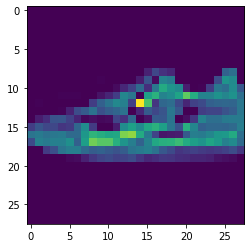

In [ ]:
imgtest = x_train[1].reshape((28,28))
plt.imshow(imgtest)
plt.show()


# CNN models

Model1-Basic Model

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (2, 2), activation='relu'))
model1.add(Flatten())
model1.add(Dense(5, activation='softmax'))
# compile model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit
model1_fit = model1.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=30)
model1.summary()

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 0.8976 - accuracy: 0.6105 - val_loss: 0.6035 - val_accuracy: 0.7496
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.5554 - accuracy: 0.7745 - val_loss: 0.5295 - val_accuracy: 0.7822
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.5047 - accuracy: 0.7969 - val_loss: 0.5014 - val_accuracy: 0.7992
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4715 - accuracy: 0.8129 - val_loss: 0.4964 - val_accuracy: 0.7956
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4437 - accuracy: 0.8221 - val_loss: 0.4539 - val_accuracy: 0.8182
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4274 - accuracy: 0.8287 - val_loss: 0.4531 - val_accuracy: 0.8171
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4022 - accuracy: 0.8413 - val_loss: 0.4367 - val_accuracy: 0.8241
Epoch 

In [ ]:
#evaluation
loss, accuracy = model1.evaluate(x_test,y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.8349
0.4736327528953552 0.8349000215530396


Plotting

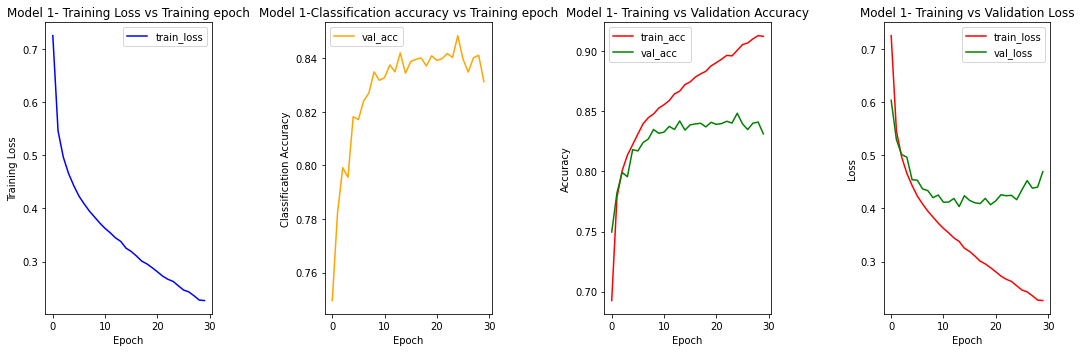

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(141)
plt.title('Model 1- Training Loss vs Training epoch')
plt.plot(model1_fit.history['loss'], label='train_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('Model 1-Classification accuracy vs Training epoch')
plt.plot(model1_fit.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('Model 1- Training vs Validation Accuracy')
plt.plot(model1_fit.history['accuracy'], label='train_acc', color='red')
plt.plot(model1_fit.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('Model 1- Training vs Validation Loss')
plt.plot(model1_fit.history['loss'], label='train_loss', color='red')
plt.plot(model1_fit.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()

Model2-Improved Model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(5, activation='softmax'))
# compile model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit
model2_fit = model2.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=30)
model2.summary()

Epoch 1/30
375/375 [==============================] - 5s 10ms/step - loss: 1.0115 - accuracy: 0.5452 - val_loss: 0.5012 - val_accuracy: 0.7950
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 0.5469 - accuracy: 0.7759 - val_loss: 0.4327 - val_accuracy: 0.8282
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 0.4786 - accuracy: 0.8087 - val_loss: 0.3947 - val_accuracy: 0.8475
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 0.4454 - accuracy: 0.8189 - val_loss: 0.3617 - val_accuracy: 0.8522
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 0.4157 - accuracy: 0.8301 - val_loss: 0.3571 - val_accuracy: 0.8642
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 0.4001 - accuracy: 0.8370 - val_loss: 0.3494 - val_accuracy: 0.8611
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3918 - accuracy: 0.8396 - val_loss: 0.3412 - val_accuracy: 0.8608
Epoch

In [ ]:
#evaluate
loss, accuracy = model2.evaluate(x_test,y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.8968
Total time taken = 0.9s
0.2636590301990509 0.8967999815940857


Plot

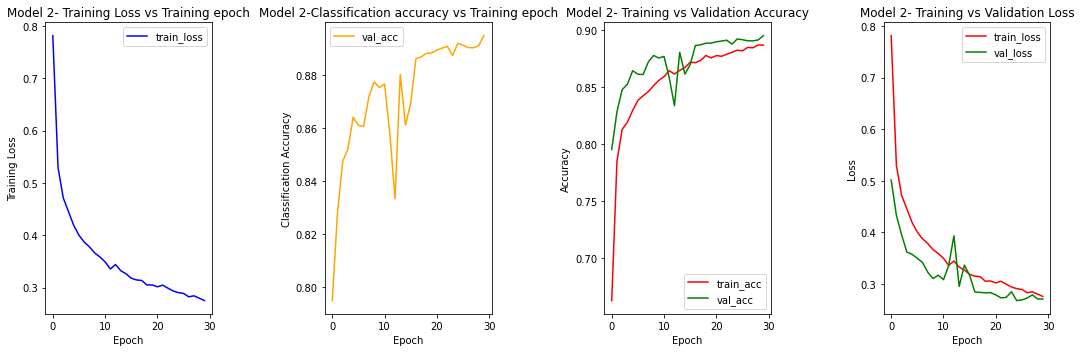

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(141)
plt.title('Model 2- Training Loss vs Training epoch')
plt.plot(model2_fit.history['loss'], label='train_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('Model 2-Classification accuracy vs Training epoch')
plt.plot(model2_fit.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('Model 2- Training vs Validation Accuracy')
plt.plot(model2_fit.history['accuracy'], label='train_acc', color='red')
plt.plot(model2_fit.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('Model 2- Training vs Validation Loss')
plt.plot(model2_fit.history['loss'], label='train_loss', color='red')
plt.plot(model2_fit.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()

#Deep Neural Network Model

Model3- Feed Forward Deep Neural Network

In [ ]:
model3=Sequential()
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(5, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit
model3_fit = model3.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)
model3.summary()

Epoch 1/30
375/375 [==============================] - 3s 5ms/step - loss: 0.9242 - accuracy: 0.5926 - val_loss: 0.5918 - val_accuracy: 0.7498
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5190 - accuracy: 0.7848 - val_loss: 0.4423 - val_accuracy: 0.8170
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.8156 - val_loss: 0.4070 - val_accuracy: 0.8372
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8456 - val_loss: 0.3759 - val_accuracy: 0.8503
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8579 - val_loss: 0.3743 - val_accuracy: 0.8503
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8639 - val_loss: 0.3546 - val_accuracy: 0.8606
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.8689 - val_loss: 0.3664 - val_accuracy: 0.8527
Epoch 

In [ ]:
#evaluate
loss, accuracy = model3.evaluate(x_test,y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8897
0.3401506245136261 0.8896999955177307


Plotting

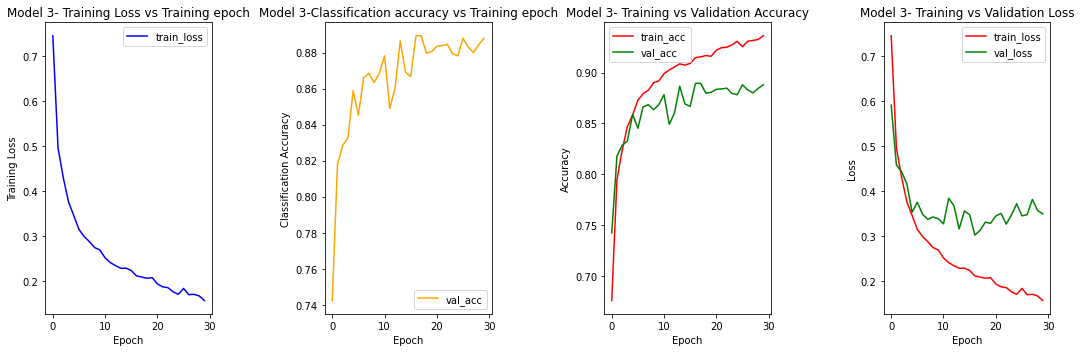

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(141)
plt.title('Model 3- Training Loss vs Training epoch')
plt.plot(model3_fit.history['loss'], label='train_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('Model 3-Classification accuracy vs Training epoch')
plt.plot(model3_fit.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('Model 3- Training vs Validation Accuracy')
plt.plot(model3_fit.history['accuracy'], label='train_acc', color='red')
plt.plot(model3_fit.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('Model 3- Training vs Validation Loss')
plt.plot(model3_fit.history['loss'], label='train_loss', color='red')
plt.plot(model3_fit.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()